## 10.3.4 Python and the normal-distribution

The randn() function of the NumPy module draw random numbers from the normal distribution.
The randn() returns a value from the distrinution with zero mean and standard deviation
of one. To simulate a chance operation where the outcomes would follow a normal distribution
with mean $\mu$ of u = 17.0 and standard deviation $\sigma$ of s = 4.0, then type (notice that we
for the sake of simplicity use u and s).

In [41]:
from numpy.random import randn # random (normal distribution)
u = 17.0
s = 4.0
randn() * s + u

21.675317843406013

The first line imports the function randn(). Random numbers are handy to simulate an
observational study or an experiment. We can specify an input parameter to randn() to a
sample of random numbers. Let us imagine that we want to simulate that we have made 4
meassuments.

In [42]:
N = 4 # Size of sample
randn(N) * s + u

array([13.49876467, 19.65102998, 13.74109722, 18.24490886])

This time, the function randn() returns a NumPy array. We can store data in a Pandas series
named data.

In [43]:
import pandas as pd

In [44]:
N = 4 # Size of sample
u = 17.0 # Mean
s = 4.0 # Standard deviation
data = pd.Series(randn(N) * s + u)
data

0    17.314405
1    11.601451
2    16.054313
3    13.722576
dtype: float64

For a sample size of 1000 we write.

In [45]:
N = 1000
u = 17.0
s = 4.0
data = pd.Series(randn(N)*s + u)
data.head(6)

0    17.698884
1    15.695675
2    23.829596
3    20.612696
4    19.230978
5    18.125415
dtype: float64

This time, the data set is to large to print to the screen, thus we used the .head(6) method
to display the first six entries. We can now investigate this simulated data as if it was real
empirical data. Let us plot the distribution.

Text(0, 0.5, 'Distribution')

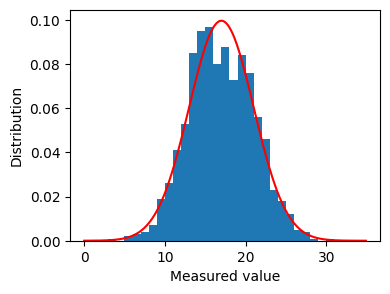

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Plot distribution of simulated data
data.plot.hist(
    figsize=(4, 3),
    bins=np.arange(0, 35, 1.0), # from 0 to 35 in steps 1.0
    density = True
)

# Plot normal distribution
y = np.arange(0, 35, 0.1)
N = np.sqrt(2*np.pi)*s
arg = -0.5*(y-u)**2/s**2 # argument for exponential
f = np.exp(arg)/N
plt.plot(y, f, 'r-') # 'r-' makes a red line

plt.xlabel('Measured value')
plt.ylabel('Distribution')

#### The cumulative distribution function
The plot.hist function can show the cumulative distribution function (CDF) when using the
input cumulative=True.

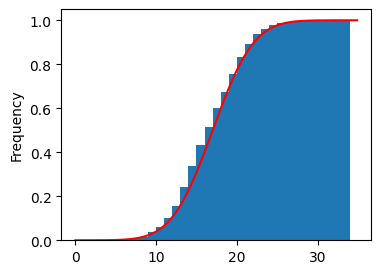

In [47]:
# cumulative distribution of simulated data
data.plot.hist(
    figsize=(4, 3),
    bins=np.arange(0, 35, 1.0), # from 0 to 35, in steps 1.0
    density = True,
    cumulative = True # Plot the cumulative distribution function
)

# Theoretical CDF of normal distribution
from scipy.stats import norm
y = np.arange(0, 35, 0.1)
cdf = norm.cdf(y, u, s)
plt.plot(y, cdf, 'r-')

The red line shows the theoretical CDF of the normal distribution. Here, we used the implementation
of the SciPy module. The normal distribution is imported with from scipy.stats
import norm. After, the associated CDF be accessed with the method norm.cdf(y, u, s).
Again, u is the mean ($\mu$), and s is the standard deviation ($\sigma$).

It can be convinient to show the cumulative distribution with the meassued values y shifted by
the mean $\mu$, and scaled by standard deviation $\sigma$: ($y-\mu$)/$\sigma$. The CDF of the normal distribution
plotted this way looks like this.

Text(0, 0.5, 'CDF of the normal distribution')

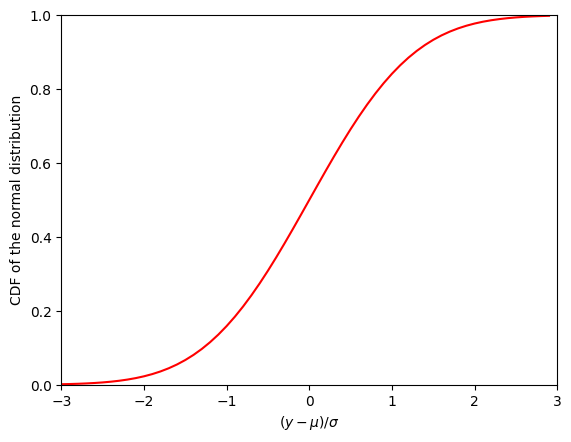

In [48]:
y = np.arange(-3.0, 3.0, 0.1)
plt.plot(y, norm.cdf(y), 'r-')
plt.xlim(-3.0, 3.0)
plt.ylim(0.0, 1.0)
plt.xlabel('$(y-\mu)/\sigma$')
plt.ylabel('CDF of the normal distribution')

## 10.3.5 How to compute meassument probabilities of the normal distribution

The question “What is the probability that a meassuments is between one standard deviation
below the mean ($\mu - \sigma$) and one standard deviation above the mean ($\mu + \sigma$)?”. For the
example with $\mu $= 17 and $\sigma$ = 4 this would be y values from 13 to 21. This can be written as
$P(\mu - \sigma < y < \mu + \sigma)$ and colmputed as shown below.

In [49]:
y_low, y_high = 13, 21
P = norm.cdf(y_high, u, s) - norm.cdf(y_low, u, s)
print(f"P = {100*P}%")

P = 68.26894921370858%


The probability that y is within the interval of two standard deviations away from the mean
is, $P(\mu - 2\sigma < y < \mu + 2\sigma)$. For the example this would be y values from 9 to 25.

In [50]:
y_low, y_high = 9, 25
P = norm.cdf(y_high, u, s) - norm.cdf(y_low, u ,s )
print(f"P = {100*P}")

P = 95.44997361036415


These are the same probabilities as can be seen in the box on page 165 (but with more accuracy).

## Exercise 10.7: Plot of the normal distributions

Use the NumPy and matplotlib modules to plot three normal-distributions in a Jupyter
Notebook. Let mean of all distributions be $\mu$ = 17:0 and standard deviations be $\sigma$ = 2:0,
$\sigma$ = 4:0 and $\sigma$ = 8:0, respectively.
1. Does the area under the curve seem to be the same for the three curves (and should
they)?

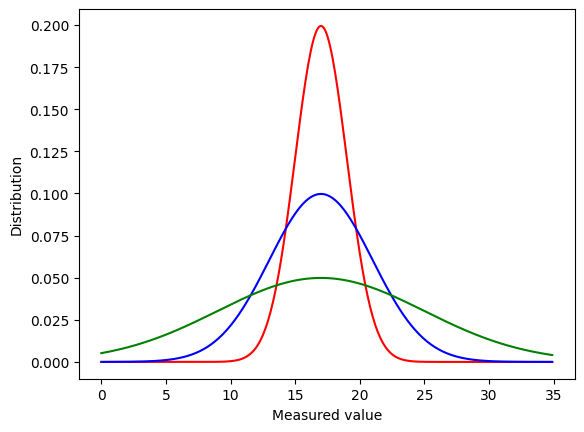

In [51]:
mu = 10.0
sigma_1 = 2.0
sigma_2 = 4.0
sigma_3 = 8.0

def normal_dist(sigma: float, colour: str):
    y = np.arange(0, 35, 0.1)
    N = np.sqrt(2*np.pi)*sigma
    arg = -0.5*(y-u)**2/sigma**2
    f = np.exp(arg)/N
    plt.plot(y, f, colour)
    plt.xlabel('Measured value')
    plt.ylabel('Distribution')

normal_dist(sigma_1, 'r-')
normal_dist(sigma_2, 'b-')
normal_dist(sigma_3, 'g-')

2. What happens to the shape of the distribution as $\sigma$ is increasing?
3. How does your answer agree with the fact that $\sigma$ describe deviation from mean?

## 10.4.3 Simulating a meta-study with Python

In [52]:
mu = 30     # Theoretical mean
sigma = 10  # Theoretical standard deviation
n = 4       # Samples in each meta-experiment
experiments = 1000 # Number of meta-experiments

import pandas as pd
from numpy.random import randn # Draw values from normal distribution
df = pd.DataFrame(sigma*randn(experiments, n) + mu)
df['sample mean'] = df.mean(axis='columns')

Text(0.5, 0, 'Mean is the sample with n= 4')

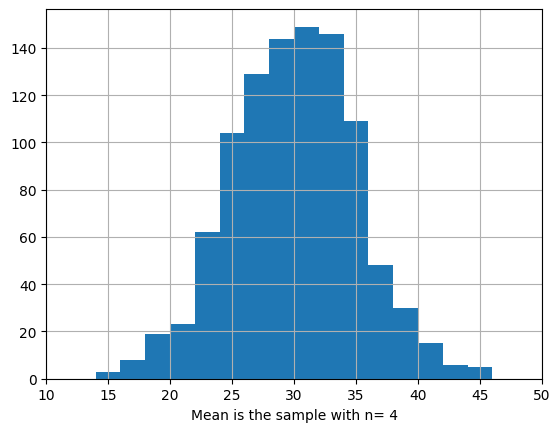

In [53]:
import matplotlib.pyplot as plt
from numpy import arange
df['sample mean'].hist(bins=arange(10, 50, 2))
plt.xlim(10, 50)
plt.xlabel(f'Mean is the sample with n= {n}')

# T_value

In [54]:
from scipy import stats
confidence_interval = 0.95 # Confidence interval (95%)
P = 1 - confidence_interval # Remaining probability (5%)
n = 30                      # Number of samples
f = n - 1                   # Degrees of freedom
t = stats.t.ppf(1-P/2, f)   # Correction factor

In [55]:
t

2.045229642132703

## 10.4.7 Confidence intervals with Python

Let us revisit the experiment where a student raises n = 4 rats on a Kinder Milk-Slice and
meassure how much weight the rats have gained. Below are the weight gains in grams of an
actual meassuent.

We will now answer the question: What is best estimate of average weight gain, and what is
the 95% confidence interval of this estimate. First, we type the data into a Pandas DataFrame.

In [56]:
import pandas as pd
df = pd.DataFrame({
    'Weight gain': [30.7, 25.7, 26.6, 25.9]
})
df

,Weight gain
0,30.7
1,25.7
2,26.6
3,25.9


The sample mean is our best estimate for the average weight gain

In [57]:
mean = df['Weight gain'].mean()
print(f'The sample mean is {mean}')

The sample mean is 27.225


To compute the 95% confidence interval we first compute the correction factor t

In [60]:
from scipy import stats
confidence_interval = 0.95 # Confidence interval (95%)
P = 1 - confidence_interval # Remaining probability (5%)
n = len(df)                 # Number of samples
f = n -1                    # Degrees of freedom
t = stats.t.ppf(1-P/2, f)   # Correction factor
print(f't_{1-P/2} = {t}')

t_0.975 = 3.182446305284263


The standard deviation of the sample is

In [61]:
df['Weight gain'].std()

2.348581131946123

while the estimate of the standard deviation of the sample mean is $(SE_y = \frac{s}{\sqrt{n}})$

In [62]:
SEy = df['Weight gain'].std()/len(df)**0.5
SEy

1.1742905659730616

From the above we can now compute the limits of the 95% confidence interval.

In [63]:
delta_mean = t*SEy
print(f'The lower limit of the 95% confidence interval is {mean-delta_mean}')
print(f'The upper limit of the 95% confidence interval is {mean+delta_mean}')

The lower limit of the 95% confidence interval is 23.487883326988864
The upper limit of the 95% confidence interval is 30.96211667301114


The 66% confidence interval is.

In [64]:
confidence_interval = 0.67 # Confidence interval 67%
P = 1-confidence_interval # Remaining probability (33%)
n = len(df)               # Number of samples
f = n - 1                 # Degree of freedom
t = stats.t.ppf(1-P/2, f) # Correction factor
print(f't_{1-P/2} = {t}')

t_0.835 = 1.1599415468283476


In [65]:
delta_mean = t*SEy
print(f'The lower limit of the 66% confidence interval is {mean-delta_mean}')
print(f'The upper limit of the 66% confidence interval is {mean+delta_mean}')

The lower limit of the 66% confidence interval is 25.86289158447927
The upper limit of the 66% confidence interval is 28.58710841552073


We now wish to estimate the confidence intervals if the students performed 64 meassuments
(using the standard deviation given above). Then standard deviation of the sample mean will
be a bit smaller

In [66]:
n = 64
SEy = df['Weight gain'].std()/n**0.5
SEy

0.2935726414932654

For the 95% confidence interval the correction factor is

In [67]:
confidence_interval = 0.95 # Confidence interval (95%)
P = 1-confidence_interval # Remaining probability ( 5%)
f = n - 1 # Degrees of fredom
t = stats.t.ppf(1-P/2, f) # Correction factor
print(f't_{1-P/2}={t}')

t_0.975=1.9983405417721956


We note that is close to two. For a moderate amount of meassument it is often fair to assume
that t ' 2 for the 95% confidence interval. The predicted range of the confidence interval is for
64 meassuments is (in grams)

In [68]:
2*t*SEy

1.173316222902293